In [112]:
import wooldridge as woo
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

# Zach Johnson Project 3 
## ECON610
This assignmenmt serves to find those communities where discrimination occurs

In [2]:
data = pd.read_stata('project3data.dta')

In [3]:
data

,income,pmedsoda,propblack,poverty
0,44534.0,1.12,0.171154,0.036579
1,44534.0,1.06,0.171154,0.036579
2,41164.0,1.06,0.047360,0.087907
3,50366.0,1.12,0.052839,0.059123
4,72287.0,1.12,0.034480,0.025415
...,...,...,...,...
405,54632.0,1.11,0.029728,0.016754
406,40585.0,0.95,0.058840,0.057362
407,40585.0,0.97,0.058840,0.057362
408,40585.0,0.97,0.058840,0.057362


In [5]:
data.describe()

,income,pmedsoda,propblack,poverty
count,409.000000,402.000000,409.000000,409.000000
mean,47053.789062,1.044875,0.113487,0.071297
std,13179.288086,0.088687,0.182416,0.067439
min,15919.000000,0.730000,0.000000,0.004298
25%,37883.000000,0.980000,0.011649,0.029710
50%,46272.000000,1.060000,0.041444,0.044441
75%,54981.000000,1.085000,0.121059,0.082159
max,136529.000000,1.490000,0.981658,0.418480


Text(0, 0.5, 'Price of Medium-Sized Soda')

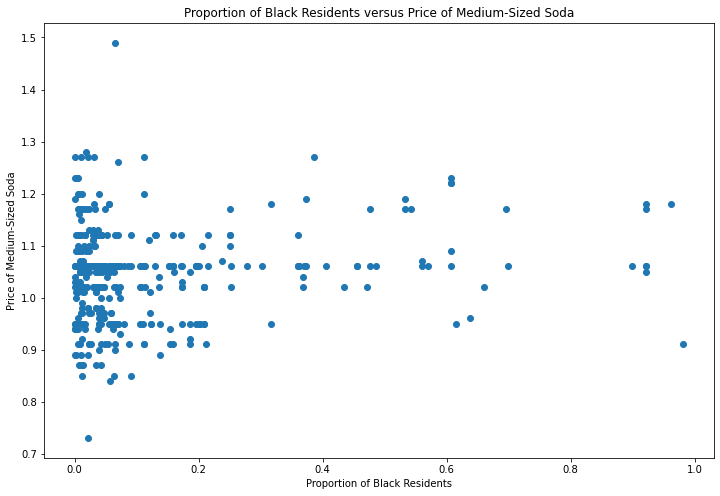

In [13]:
fig, ax = plt.subplots(figsize = (12, 8))
plt.scatter(data['propblack'], data['pmedsoda'])
ax.set_title("Proportion of Black Residents versus Price of Medium-Sized Soda")
ax.set_xlabel("Proportion of Black Residents")
ax.set_ylabel("Price of Medium-Sized Soda")

In [26]:
data['pmedsoda']

0      1.12
1      1.06
2      1.06
3      1.12
4      1.12
       ... 
405    1.11
406    0.95
407    0.97
408    0.97
409    1.02
Name: pmedsoda, Length: 410, dtype: float32

In [83]:
Y = pd.DataFrame(data['pmedsoda'].dropna())
X = data['propblack'].reindex_like(data['pmedsoda'].dropna())
X = sm.add_constant(X)

In [84]:
Y

,pmedsoda
0,1.12
1,1.06
2,1.06
3,1.12
4,1.12
...,...
405,1.11
406,0.95
407,0.97
408,0.97


In [85]:
reg_data = X.join(Y).dropna()

In [86]:
reg_data.dropna()

,const,propblack,pmedsoda
0,1.0,0.171154,1.12
1,1.0,0.171154,1.06
2,1.0,0.047360,1.06
3,1.0,0.052839,1.12
4,1.0,0.034480,1.12
...,...,...,...
405,1.0,0.029728,1.11
406,1.0,0.058840,0.95
407,1.0,0.058840,0.97
408,1.0,0.058840,0.97


In [94]:
Y = reg_data['pmedsoda']
X = reg_data['propblack']
X = sm.add_constant(reg_data['propblack'])
model = sm.OLS(Y, X)

In [95]:
fit = model.fit()

In [96]:
summary = fit.summary()

In [97]:
print(summary)

                            OLS Regression Results                            
Dep. Variable:               pmedsoda   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     7.345
Date:                Tue, 27 Sep 2022   Prob (F-statistic):            0.00702
Time:                        13:14:28   Log-Likelihood:                 406.14
No. Observations:                 401   AIC:                            -808.3
Df Residuals:                     399   BIC:                            -800.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0374      0.005    199.867      0.0

In [107]:
print(data[['pmedsoda', 'propblack']].corr())

           pmedsoda  propblack
pmedsoda   1.000000   0.134445
propblack  0.134445   1.000000


In [108]:
print(data[['pmedsoda', 'propblack']].corr()**2)

           pmedsoda  propblack
pmedsoda   1.000000   0.018076
propblack  0.018076   1.000000


In [135]:
data['lpmedsoda'] = np.log(data['pmedsoda'])
data['lincome'] = np.log(data['income'])
data['constant'] = 1

In [142]:
data = data.dropna()

In [151]:
Y = data[['lpmedsoda']]
X = data[['lincome', 'propblack']]
X = sm.add_constant(X)
ln_model = sm.OLS(Y, X)

In [152]:
ln_fit = ln_model.fit()

In [153]:
print(ln_fit.summary())

                            OLS Regression Results                            
Dep. Variable:              lpmedsoda   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     14.54
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           8.04e-07
Time:                        15:04:58   Log-Likelihood:                 434.93
No. Observations:                 401   AIC:                            -863.9
Df Residuals:                     398   BIC:                            -851.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7938      0.179     -4.424      0.0

In [156]:
Y = data[['lpmedsoda']]
X = data[['lincome', 'propblack', 'poverty']]
X = sm.add_constant(X)
ln_model2 = sm.OLS(Y, X)

In [157]:
ln_fit2 = ln_model.fit()

In [158]:
print(ln_fit2.summary())

                            OLS Regression Results                            
Dep. Variable:              lpmedsoda   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     12.60
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           6.92e-08
Time:                        15:13:55   Log-Likelihood:                 439.04
No. Observations:                 401   AIC:                            -870.1
Df Residuals:                     397   BIC:                            -854.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4633      0.294     -4.982      0.0